In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Generate linear data

Want a distribution of (x,y) pairs that fall on a line

$y = 2x+b+z$

$z \sim N(0,\sigma^2)$

In [27]:
max_x = 10
num_points = 10000
b=1
sigma = 2.5 
x=max_x*np.random.rand(num_points)
z = np.random.normal(0,sigma,num_points)
y=2*x+b+z

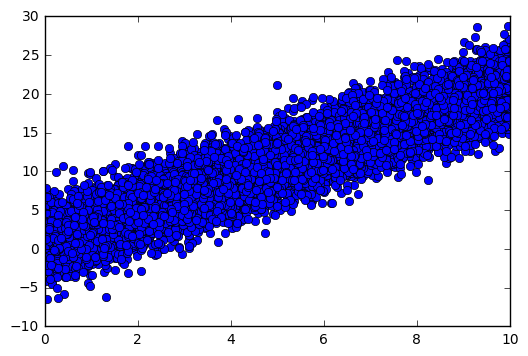

In [28]:
plt.plot(x,y,'o')

In [29]:
X = np.ndarray([num_points,2])
X[:,0] = x
X[:,1] = y

In [30]:
X.shape

(10000, 2)

# Laten space

In [31]:
z_size=10
def Z(batch_size,z_size=10):
    return np.random.uniform(-1.,1.,size=[batch_size,z_size])

# Miscellanous

In [32]:
batch_size = 100

# Linear discriminator

In [33]:
g = tf.Graph()
with g.as_default():
    data_input = tf.placeholder(tf.float32,shape=[batch_size,2])
    
    W_d1 = tf.Variable(tf.truncated_normal([2,100]))
    b_d1 = tf.Variable(tf.zeros([100]))
    W_d2 = tf.Variable(tf.truncated_normal([100,1]))
    b_d2 = tf.Variable(tf.zeros([1]))
    
    d_vars = [W_d1,b_d1,W_d2,b_d2]
    def D(x,var_l):
        W1,b1 = var_l[0],var_l[1]
        W2,b2 = var_l[2],var_l[3]
        logit=tf.matmul(tf.sigmoid(tf.matmul(x,W1)+b1),W2)+b2
        return logit

# Linear generator

In [34]:
with g.as_default():
    z_input = tf.placeholder(tf.float32,shape=[batch_size,z_size])
    
    W_g1 = tf.Variable(tf.truncated_normal([z_size,100]))
    b_g1 = tf.Variable(tf.zeros([100]))
    W_g2 = tf.Variable(tf.truncated_normal([100,2]))
    b_g2 = tf.Variable(tf.zeros([2]))
    
    g_vars =[W_g1,b_g1,W_g2,b_g2]
    
    def G(z,var_l):
        W1,b1 = var_l[0],var_l[1]
        W2,b2 = var_l[2],var_l[3]
        
        l1 = tf.sigmoid(tf.matmul(z,W1)+b1)
        g = tf.matmul(l1,W2)+b2
        
        return g

# Train

In [35]:
with g.as_default():
    D_data = D(data_input,d_vars)
    G_z = G(z_input,g_vars)
    D_g = D(G_z,d_vars)
    
    loss_d =-tf.reduce_mean(tf.log(tf.sigmoid(D_data)) +tf.log(1- tf.sigmoid(D_g)))
    loss_g = tf.reduce_mean(tf.log(1- tf.sigmoid(D_g)))
    
    opt = tf.train.AdamOptimizer(learning_rate=.0002,beta1=.5)
    
    train_d = opt.minimize(loss_d,var_list=d_vars)
    train_g = opt.minimize(loss_g,var_list=g_vars)

# Other ops

In [36]:
with g.as_default():
    init = tf.initialize_all_variables()

# Train Session

In [37]:
sess = tf.Session(graph = g)
sess.run(init)

In [38]:
epoch_size = X.shape[0]/batch_size

In [39]:
lossesd,lossesg = [],[]

In [45]:
num_epochs = 100
for _ in range(num_epochs):
    for s in range(epoch_size):
        fd = {data_input:X[s*batch_size:s*batch_size+batch_size,:],z_input:Z(batch_size,z_size)}
        ld,_=sess.run([loss_d,train_d],feed_dict=fd)
        lg,_=sess.run([loss_g,train_g],feed_dict=fd)
        lossesd.append(ld),lossesg.append(lg)

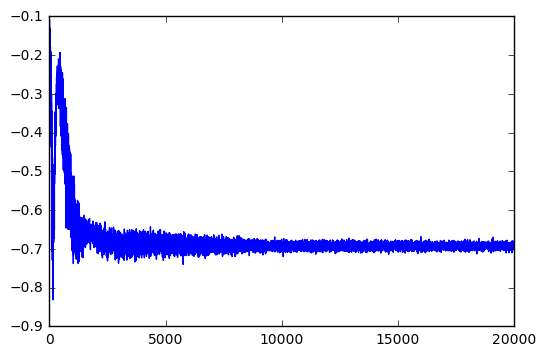

In [46]:
plt.plot(lossesg)

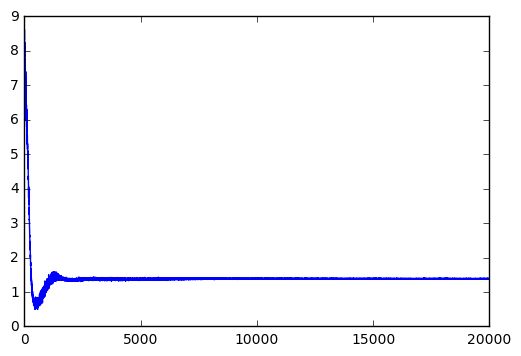

In [47]:
plt.plot(lossesd)

# Visualize

In [48]:
G_test=sess.run(G_z,feed_dict=fd)

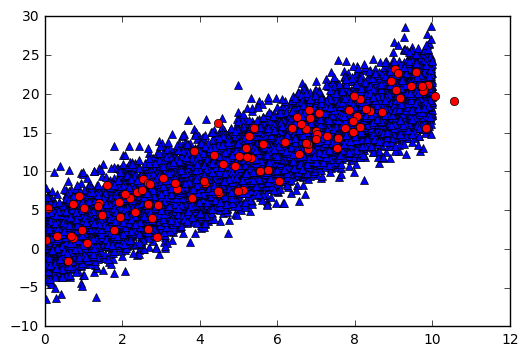

In [49]:
plt.plot(X[:,0],X[:,1],'b^',G_test[:,0],G_test[:,1],'ro')
# plt.savefig('images/img')